In [33]:
import json
from gensim import corpora, models
import re
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

pathway = "/Users/jeremyfeagan/Library/Mobile Documents/com~apple~CloudDocs/MyGitRepo/ChatGPT Project/conversations.json"

# Load the JSON data from the file
with open(pathway, 'r', encoding='utf-8') as file:
    data = json.load(file)


In [34]:
import pandas as pd

# Create a DataFrame from the JSON data
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head()


,title,create_time,update_time,mapping,moderation_results,current_node,plugin_ids,conversation_id,conversation_template_id,gizmo_id,is_archived,safe_urls,id
0,Expense Tracker Categories,1.706800e+09,1.706803e+09,{'b737d6a3-4d05-4387-aa79-ca7258359e62': {'id'...,[],01a048b6-5bb3-4b42-a369-884eb787703f,None,56d809f5-6899-431c-8ed9-1d56b5550285,None,None,False,[],56d809f5-6899-431c-8ed9-1d56b5550285
1,Self-Awareness & Motivation Improvement,1.706793e+09,1.706798e+09,{'f742e920-6902-4067-a4b6-ffc7609b0a2e': {'id'...,[],db8ac04e-0b0b-42df-80a1-5634fe456ad7,None,412c1cd6-8a0d-4f47-b69b-d1f60c9ba7c9,None,None,False,[],412c1cd6-8a0d-4f47-b69b-d1f60c9ba7c9
2,Build AI Expert with Data,1.706791e+09,1.706791e+09,{'fef8a58e-3a6b-4831-8082-60ce6729ece0': {'id'...,[],37291ff4-1f90-451b-bbcf-2a2fcc8d7510,None,34c5c0a9-dd62-4ee9-b30f-6e641b6ddf9e,None,None,False,[],34c5c0a9-dd62-4ee9-b30f-6e641b6ddf9e
3,Root Causes of Low Vaccination,1.706790e+09,1.706790e+09,{'876d6e51-ec68-4ae3-87fe-7d8005b3f72a': {'id'...,[],e3001342-e692-4531-8ce2-5af61d84d579,None,870c1a6a-e0fa-4e76-bba6-4d1d56b38cef,None,None,False,[],870c1a6a-e0fa-4e76-bba6-4d1d56b38cef
4,Hidden Figures Movie Discussion,1.706752e+09,1.706752e+09,{'6afa7b68-d874-43b5-8ff7-8b70c8540f4e': {'id'...,[],8f53b188-6203-46f9-9ea0-0c4cb7c2feeb,None,ed3bc077-13f5-4d35-85e2-f3b72059ce07,None,None,False,[],ed3bc077-13f5-4d35-85e2-f3b72059ce07


In [35]:
# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Extend STOPWORDS with common programming and mathematical terms if necessary
extended_stopwords = STOPWORDS.union(set(['=', '+', '-', '*', '/', '(', ')', '#', '->', 'int', 'float', 'print', 'def']))

# Initialize a lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove URLs, numbers, and special characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in extended_stopwords and token not in stopwords.words('english')]
    return ' '.join(tokens)

# Assuming text_data is a list of texts from your JSON 'mapping' content
preprocessed_texts = [preprocess_text(text) for text in text_data]

# You can then proceed with these preprocessed texts for further analysis or modeling


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jeremyfeagan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeremyfeagan/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeremyfeagan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Preprocess the texts (assuming `text_data` contains your raw text)
def preprocess_text(text):
    # Lowercasing, removing special characters, numbers, and URLs
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'^b\s+', '', text)
    text = re.sub(r'\d', '', text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_text = [word for word in words if word not in stop_words]
    return filtered_text

# Applying preprocessing
processed_texts = [preprocess_text(document) for document in text_data]

# Preparing the dictionary and corpus for LDA
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Applying LDA
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Displaying identified topics
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jeremyfeagan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeremyfeagan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0, '0.011*"health" + 0.011*"healthcare" + 0.009*"patient" + 0.007*"patients"')
(1, '0.004*"like" + 0.004*"time" + 0.004*"american" + 0.003*"one"')
(2, '0.020*"data" + 0.014*"column" + 0.009*"code" + 0.008*"python"')
(3, '0.009*"use" + 0.008*"text" + 0.007*"information" + 0.006*"x"')
(4, '0.007*"function" + 0.006*"failure" + 0.006*"treatment" + 0.005*"blood"')


In [38]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_text = [word for word in words if word not in stop_words]
    return filtered_text

# Assuming `data` is your loaded JSON conversations
text_data = [convo['mapping'] for convo in data]  # Adjust based on your JSON structure
processed_texts = [preprocess_text(" ".join(convo)) for convo in text_data]  # Adjust joining based on your data

# Create Dictionary and Corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Apply LDA Model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=20)
topics = lda_model.print_topics(num_words=5)

# Print the topics
for topic in topics:
    print(topic)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jeremyfeagan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeremyfeagan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0, '0.000*"498d" + 0.000*"40a3" + 0.000*"4735" + 0.000*"4b95" + 0.000*"45a1"')
(1, '0.000*"4391" + 0.000*"44e0" + 0.000*"484f" + 0.000*"4985" + 0.000*"4e92"')
(2, '0.000*"4579" + 0.000*"471c" + 0.000*"b0be" + 0.000*"4f8d" + 0.000*"486d"')
(3, '0.000*"4979" + 0.000*"40df" + 0.000*"4591" + 0.000*"4532" + 0.000*"4568"')
(4, '0.000*"46e2" + 0.000*"4603" + 0.000*"420e" + 0.000*"4cbd" + 0.000*"4a82"')
(5, '0.000*"4264" + 0.000*"43d2" + 0.000*"419e" + 0.000*"4eba" + 0.000*"489d"')
(6, '0.000*"447d" + 0.000*"4183" + 0.000*"43a5" + 0.000*"4c0a" + 0.000*"4a72"')
(7, '0.000*"4fac" + 0.000*"4236" + 0.000*"4426" + 0.000*"40a3" + 0.000*"4eae"')
(8, '0.000*"4156" + 0.000*"4414" + 0.000*"4140" + 0.000*"4d64" + 0.000*"9a3b"')
(9, '0.000*"4c15" + 0.000*"4a07" + 0.000*"4b48" + 0.000*"4eb4" + 0.000*"49d1"')


In [39]:
# Ensure necessary NLTK data is downloaded
nltk.download('stopwords')

# Custom preprocessing function
def preprocess_text(text):
    # Remove hexadecimal codes and non-ASCII characters
    text = re.sub(r'\b[0-9a-fA-F]{4,}\b', '', text)
    # Keep only words with alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize and remove stopwords
    tokenizer = RegexpTokenizer(r'\w+')
    stop_words = set(stopwords.words('english'))
    tokens = tokenizer.tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words and len(token) > 1]
    return filtered_tokens

# Assuming 'text_data' is a list of your conversation texts
processed_texts = [preprocess_text(text) for text in text_data]

# Create Dictionary and Corpus for LDA
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Apply LDA Model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=20, random_state=100)

# Display identified topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeremyfeagan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TypeError: expected string or bytes-like object, got 'dict'

In [36]:
# Get summary statistics of the DataFrame
summary_stats = df.describe()
summary_stats

,create_time,update_time
count,4.200000e+02,4.200000e+02
mean,1.697029e+09,1.697169e+09
std,7.888773e+06,7.906662e+06
min,1.672583e+09,1.673850e+09
25%,1.688579e+09,1.688887e+09
50%,1.699216e+09,1.699267e+09
75%,1.704741e+09,1.704798e+09
max,1.706800e+09,1.706827e+09


In [25]:
columns = df.columns
columns


Index(['title', 'create_time', 'update_time', 'mapping', 'moderation_results',
       'current_node', 'plugin_ids', 'conversation_id',
       'conversation_template_id', 'gizmo_id', 'is_archived', 'safe_urls',
       'id'],
      dtype='object')

In [26]:
# Explore the structure of your data
# For example, print the keys of the first conversation
print(data[0].keys())


dict_keys(['title', 'create_time', 'update_time', 'mapping', 'moderation_results', 'current_node', 'plugin_ids', 'conversation_id', 'conversation_template_id', 'gizmo_id', 'is_archived', 'safe_urls', 'id'])


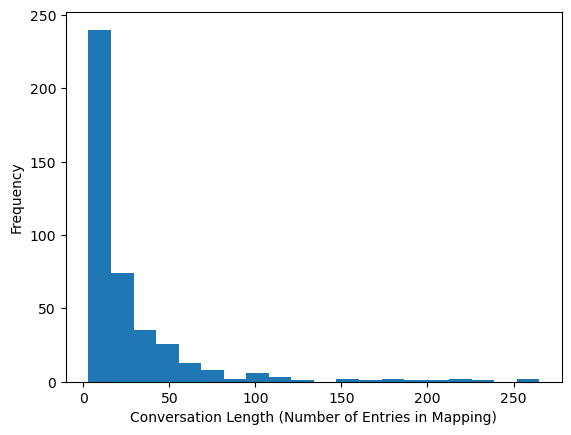

In [27]:
import json
import matplotlib.pyplot as plt

# Assuming you've loaded your JSON data into a variable named 'data'
# and 'mapping' or another key holds information relevant to conversation length

# Example: Count the number of entries in 'mapping' as a proxy for conversation length
conversation_lengths = [len(convo['mapping']) for convo in data if 'mapping' in convo]

plt.hist(conversation_lengths, bins=20)
plt.xlabel('Conversation Length (Number of Entries in Mapping)')
plt.ylabel('Frequency')
plt.show()


In [32]:
# Extract conversation texts from the 'mapping' key
text_data = []
for conversation in data:
    for key, value in conversation['mapping'].items():
        message = value.get('message')
        if message:
            content = message.get('content')
            if content:
                parts = content.get('parts')
                if parts and isinstance(parts, list):  # Ensure 'parts' is a list
                    parts_texts = []
                    for part in parts:
                        if isinstance(part, dict) and 'text' in part:
                            parts_texts.append(part.get('text', ''))
                        elif isinstance(part, str):
                            parts_texts.append(part)
                    combined_text = ' '.join(parts_texts).strip()
                    if combined_text:  # Ensure non-empty string
                        text_data.append(combined_text)

# Tokenize the text data
tokenized_text = [text.split() for text in text_data]

# Create a dictionary and document-term matrix
dictionary = corpora.Dictionary(tokenized_text)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_text]

# Train an LDA topic model
lda_model = models.LdaModel(doc_term_matrix, num_topics=5, id2word=dictionary, passes=15)

# Get the topics and their associated keywords
topics = lda_model.print_topics()
for topic in topics:
    print(topic)

(0, '0.053*"the" + 0.041*"of" + 0.036*"and" + 0.018*"a" + 0.016*"in" + 0.012*"to" + 0.009*"The" + 0.006*"as" + 0.005*"by" + 0.005*"for"')
(1, '0.050*"and" + 0.032*"the" + 0.030*"to" + 0.024*"of" + 0.016*"a" + 0.015*"in" + 0.013*"for" + 0.013*"-" + 0.010*"with" + 0.007*"that"')
(2, '0.053*"the" + 0.033*"to" + 0.027*"a" + 0.024*"of" + 0.022*"and" + 0.015*"you" + 0.014*"I" + 0.014*"that" + 0.013*"in" + 0.013*"is"')
(3, '0.026*"the" + 0.023*"+" + 0.021*"=" + 0.020*"-" + 0.013*"of" + 0.008*"is" + 0.007*"to" + 0.005*"and" + 0.005*"\\(" + 0.005*"\\item"')
(4, '0.053*"the" + 0.021*"=" + 0.017*"to" + 0.015*"#" + 0.014*"in" + 0.012*"and" + 0.012*"for" + 0.012*"of" + 0.010*"a" + 0.007*"data"')
